In [1]:
import pandas as pd
import yfinance as yf 
import datetime as dt
from datetime import date, timedelta

In [2]:
today = date.today()

In [3]:
d1 = today.strftime("%Y-%m-%d")

In [4]:
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG',start=start_date,end=end_date,progress= False)

data["Date"] = data.index
data = data[["Date","Open","High","Low","Close","Adj Close","Volume"]]
data.reset_index(drop=True, inplace=True)

In [5]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-27,90.089996,90.449997,89.610001,90.099998,90.099998,22724300
1,2023-02-28,89.540001,91.449997,89.519997,90.300003,90.300003,30546900
2,2023-03-01,90.160004,91.199997,89.849998,90.510002,90.510002,26323900
3,2023-03-02,89.860001,92.480003,89.769997,92.309998,92.309998,23328600
4,2023-03-03,92.739998,94.110001,92.660004,94.019997,94.019997,30242500
5,2023-03-06,94.360001,96.300003,94.300003,95.580002,95.580002,28288200
6,2023-03-07,95.419998,96.089996,93.844002,94.169998,94.169998,24101500
7,2023-03-08,94.404999,96.239998,94.404999,94.650002,94.650002,25395200
8,2023-03-09,94.489998,95.919998,92.355003,92.660004,92.660004,24438900
9,2023-03-10,92.500000,93.180000,90.800003,91.010002,91.010002,32850100


In [7]:
data_c = data[["Date","Close"]]

In [8]:
data_c.head(10)

,Date,Close
0,2023-02-27,90.099998
1,2023-02-28,90.300003
2,2023-03-01,90.510002
3,2023-03-02,92.309998
4,2023-03-03,94.019997
5,2023-03-06,95.580002
6,2023-03-07,94.169998
7,2023-03-08,94.650002
8,2023-03-09,92.660004
9,2023-03-10,91.010002


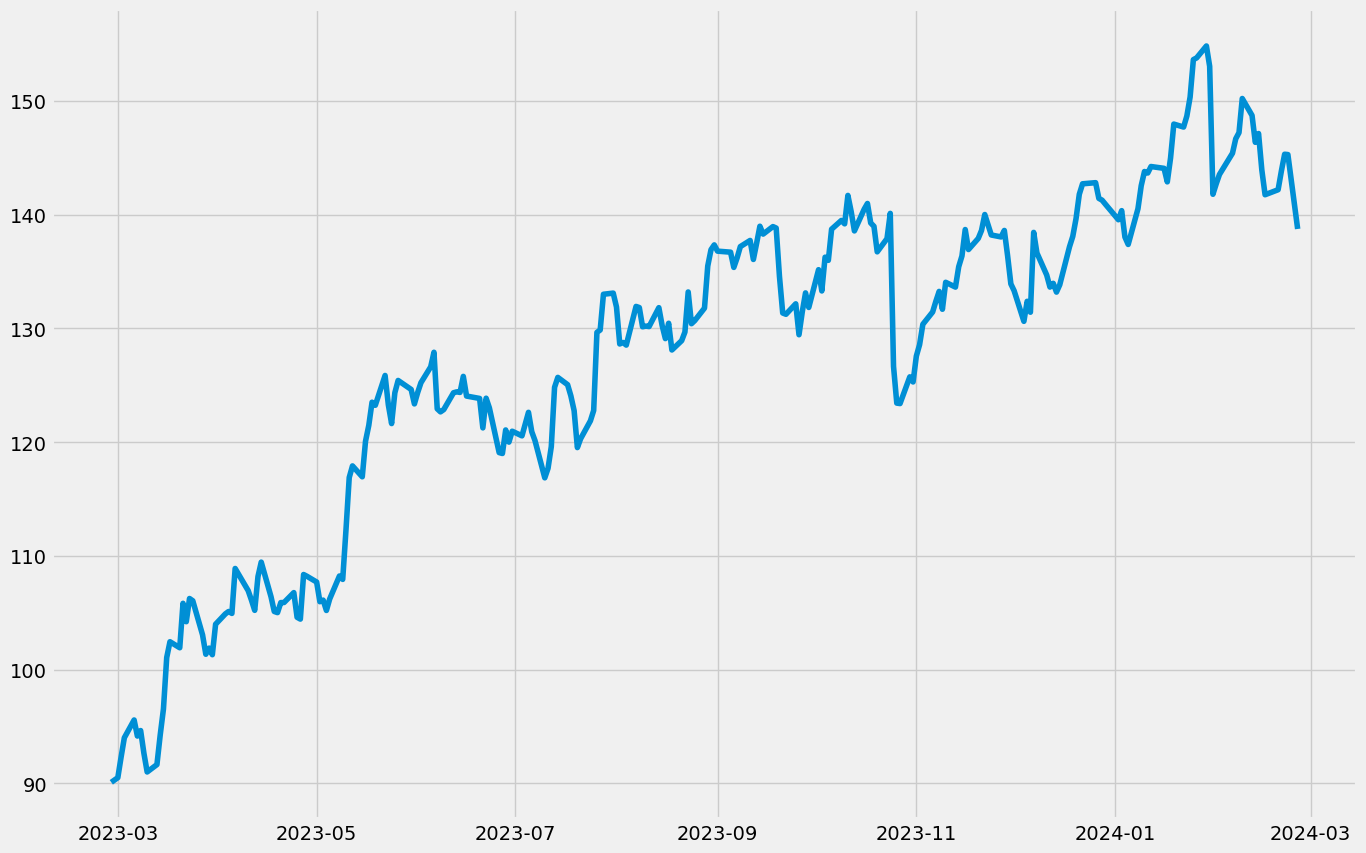

In [9]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data["Date"],data["Close"])

<Figure size 640x480 with 0 Axes>

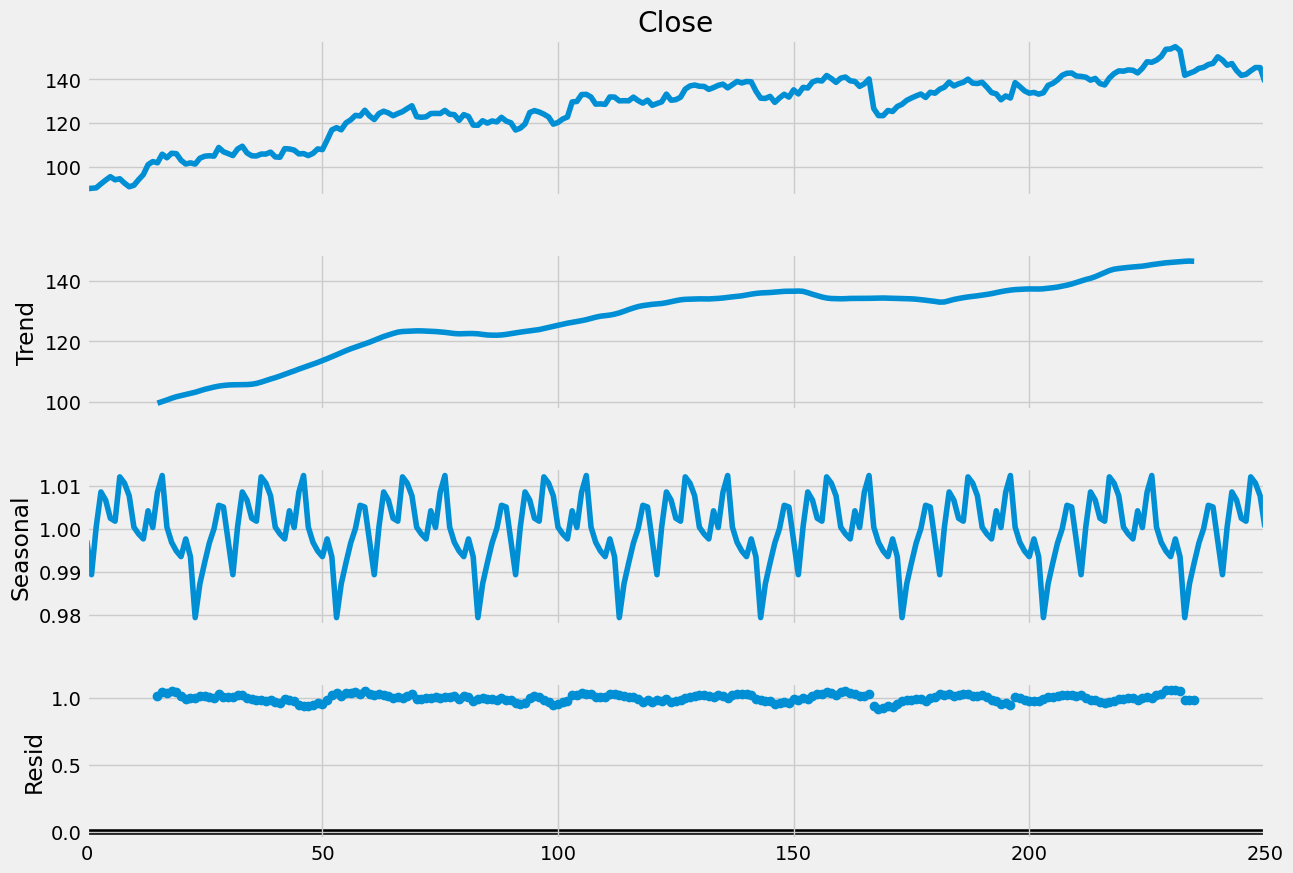

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"],model='multiplicative',period = 30)
fig= plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

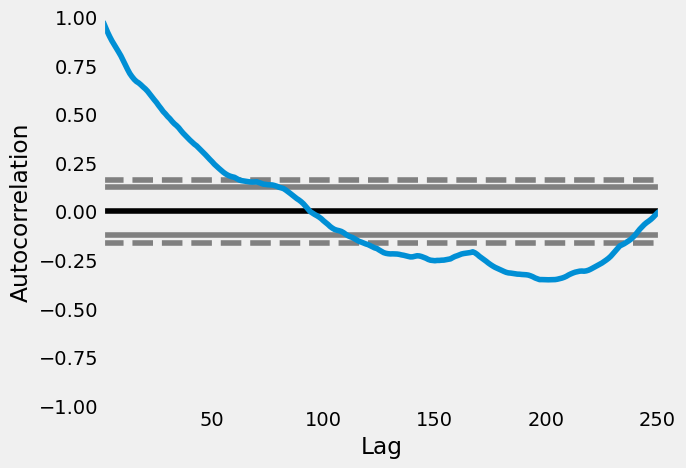

In [11]:
pd.plotting.autocorrelation_plot(data["Close"]) # p = 6

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf


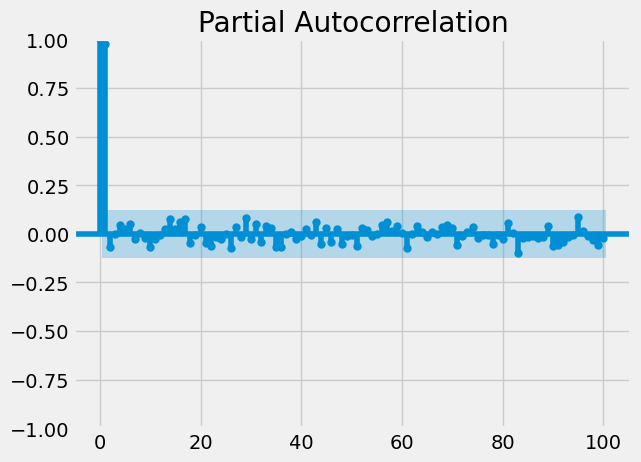

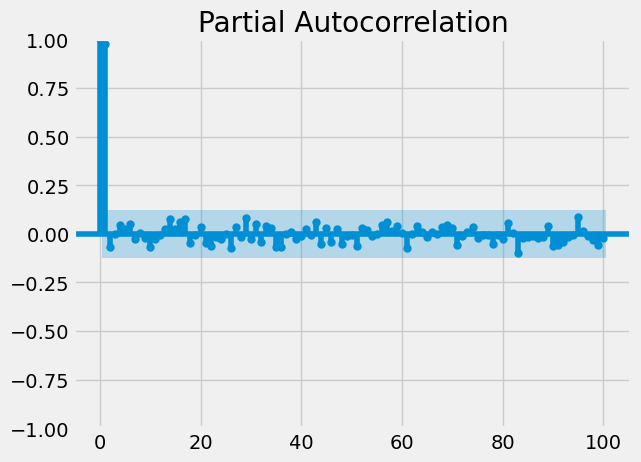

In [13]:
plot_pacf(data_c["Close"],lags=100,use_vlines=True) # q = 2

In [14]:
''' 
p is the order of autoredressive part, q = order of moving average part,
d is the degree of first differencing involved (0: stationary, 1: seasonal)
'''
p,q,d = 6,3,1

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"],order=(p,d,q))
fitted = model.fit()
print(fitted.summary())

C:\Users\mahat\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mahat\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(6, 1, 3)   Log Likelihood                -551.423
Date:                Tue, 27 Feb 2024   AIC                           1122.846
Time:                        17:54:57   BIC                           1158.061
Sample:                             0   HQIC                          1137.019
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3050      0.121      2.517      0.012       0.067       0.542
ar.L2          0.2990      0.114      2.612      0.009       0.075       0.523
ar.L3         -0.9510      0.134     -7.076      0.0

C:\Users\mahat\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1       90.100028
2       90.312880
3       90.520507
4       92.410976
          ...    
246    142.049735
247    142.887342
248    144.458567
249    145.235726
250    145.228334
Name: predicted_mean, Length: 251, dtype: float64


In [16]:
data_c["Arima_Predicted"] = predictions

C:\Users\mahat\AppData\Local\Temp\ipykernel_1988\3438214162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c["Arima_Predicted"] = predictions


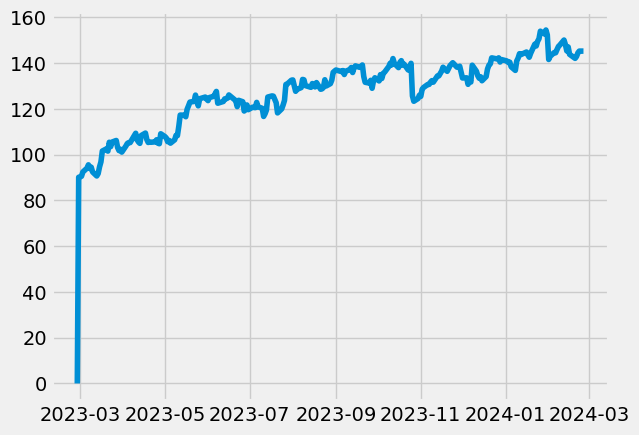

In [17]:
plt.plot(data_c["Date"],data_c["Arima_Predicted"])

In [18]:
import statsmodels.api as sm
import warnings
model = sm.tsa.statespace.SARIMAX(data["Close"],order=(p,d,q),seasonal_order=(p,d,q,12))

In [19]:
model = model.fit()

C:\Users\mahat\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mahat\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mahat\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(6, 1, 3)x(6, 1, 3, 12)   Log Likelihood                -538.940
Date:                            Tue, 27 Feb 2024   AIC                           1115.880
Time:                                    17:55:37   BIC                           1181.853
Sample:                                         0   HQIC                          1142.468
                                            - 251                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2987      0.165      1.814      0.070      -0.024       0.621
ar.L2          0.3480      0.197      1.771      0.077      -0.037       0.733
ar.L3         -0.8756      0.179     -4.902      0.000      -1.226      -0.526
ar.L4          0.0440      0.096      0.459      0.646      -0.144       0.232
ar.L5         -0.0324      0.102     -0.318      0.750      -0.232       0.167
ar.L6         -0.1339      0.107     -1.246      0.213      -0.345       0.077
ma.L1         -0.2650      0.164     -1.614      0.107      -0.587       0.057
ma.L2         -0.3641      0.197     -1.847      0.065      -0.750       0.022
ma.L3          0.8330      0.163      5.123      0.000       0.514       1.152
ar.S.L12      -0.8927      0.548     -1.630      0.103      -1.966       0.181
ar.S.L24      -0.9581      0.816     -1.175      0.240      -2.557       0.641
ar.S.L36      -0.1819      0.298     -0.611      0.541      -0.765       0.402
ar.S.L48      -0.1220      0.282     -0.433      0.665      -0.674       0.430
ar.S.L60      -0.1187      0.254     -0.468      0.640      -0.616       0.379
ar.S.L72       0.0361      0.170      0.213      0.832      -0.297       0.369
ma.S.L12      -0.1583      6.212     -0.025      0.980     -12.334      12.018
ma.S.L24       0.0916      5.536      0.017      0.987     -10.759      10.943
ma.S.L36      -0.9283      5.316     -0.175      0.861     -11.347       9.490
sigma2         4.5408     27.081      0.168      0.867     -48.537      57.619
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               462.88
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -1.02
Prob(H) (two-sided):                  0.26   Kurtosis:                         9.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
predictions_S = model.predict(len(data), len(data) + 50)

In [28]:
print(predictions_S)

251    138.440189
252    137.939779
253    138.491915
254    137.834126
255    139.388470
256    140.705712
257    140.841964
258    141.582652
259    141.250103
260    140.944513
261    139.961641
262    139.806786
263    138.976087
264    139.258936
265    140.120473
266    140.513481
267    141.295630
268    142.053434
269    143.229089
270    143.123642
271    143.459972
272    143.789485
273    144.394090
274    143.954055
275    142.813140
276    142.180407
277    143.081137
278    143.858577
279    144.615842
280    145.778171
281    145.668728
282    146.442566
283    146.894113
284    147.501578
285    147.908582
286    147.563888
287    147.019872
288    146.782692
289    147.898259
290    147.915400
291    149.069213
292    149.127286
293    148.418785
294    148.858081
295    148.873651
296    149.599110
297    149.885148
298    149.459321
299    148.963365
300    149.071516
301    149.904149
Name: predicted_mean, dtype: float64


<Axes: >

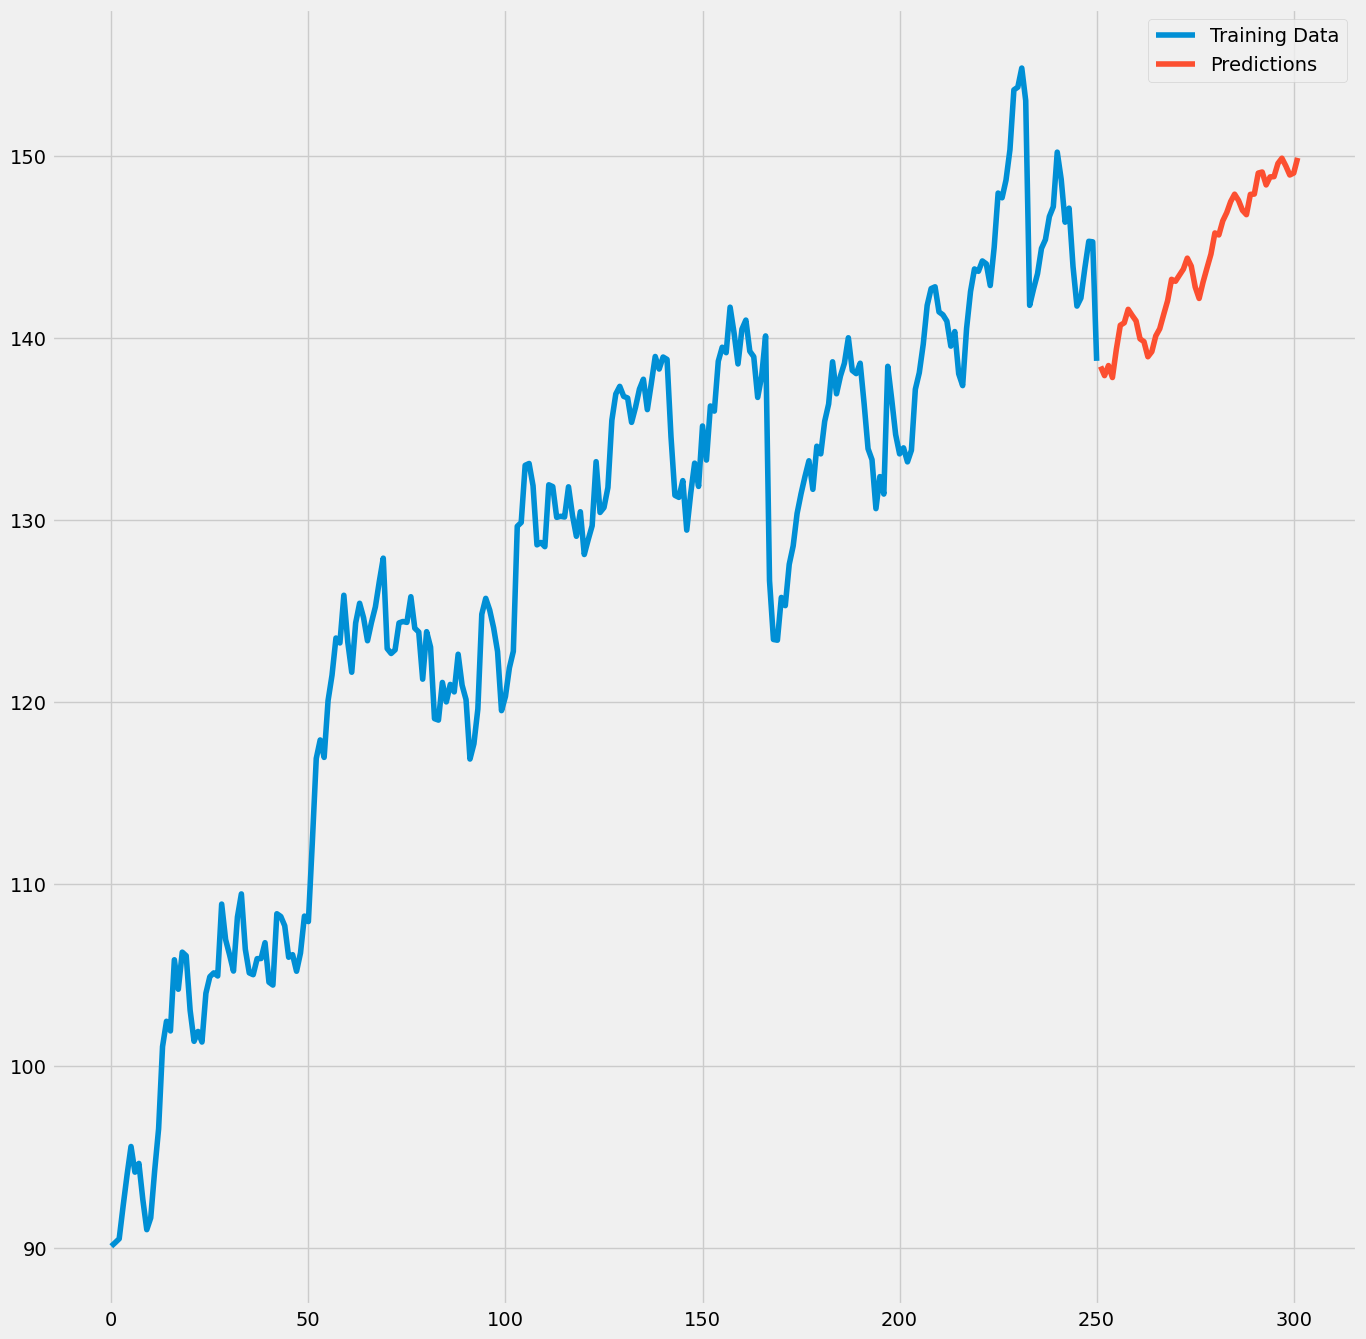

In [29]:
data["Close"].plot(legend=True, label="Training Data", figsize = (15,16))
predictions_S.plot(legend=True, label= "Predictions")